# seek(), tell() and other functions | Day #51

In [6]:
with open("file.txt","r") as f:
    data = f.read()
    print(data)
    f.seek(7) # Places cursor at 7th character
    data = f.read() # Starts reading from seek position
    print(data)
    f.seek(2) # places cursor at first byte
    data = f.read(6) # Reads only 6 bytes from the seek position
    print(data)
    curr_pos = f.tell() # Returns the curr seek position.
    print(curr_pos)

Hello, have a good day.
have a good day.
llo, h
8


In [ ]:
with open("sample_file.txt","w") as f:
    f.write("Hello WOrld")
    f.truncate(5) # Truncates the whole file content to just first 5 bytes

with open("sample_file.txt","r") as f:
    data = f.read()
    print(data)

Hello


# Lambda functions | Day #52

In [10]:
double = lambda x: 2*x
avg = lambda x,y,z: sum([x,y,z])/3
double(5),avg(3,3,6)

(10, 4.0)

In [11]:
def fun(h,g,x):
    return h(x)+g(x)

h = lambda x: x+2
g = lambda y: y**2

fun(h,g,3)

14

In [ ]:
fun(lambda x: x+2, lambda y: y**2, 3) # meaning if we want to pass tiny functions as argument to other functions, then we can define those tiny functions as lambda functions inside the function call itself

14

# Map, Filter and Reduce | Day #53

In [ ]:
# map(func, iterable)
sq = lambda x: x*x
L = [2,3,4,5,6]
X = list(map(sq,L))
X

[4, 9, 16, 25, 36]

In [14]:
# filter(function or None, iterable) --> filter object

#Return an iterator yielding those items of iterable for which function(item) is true. If function is None, return the items that are true.
larger_than_4 = lambda x: x>4
X = filter(larger_than_4,L)
list(X)

[5, 6]

In [15]:
X = filter(lambda k: k>3, L)
list(X)

[4, 5, 6]

In [16]:
from functools import reduce
"""reduce(function, iterable[, initial]) -> value

Apply a function of two arguments cumulatively to the items of a sequence
or iterable, from left to right, so as to reduce the iterable to a single
value. For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5). If initial is present, it is placed before the items
of the iterable in the calculation, and serves as a default when the
iterable is empty."""
sum = lambda x,y: x+y
X = reduce(sum,L)
X

20

# 'is' vs '==' | Day #54
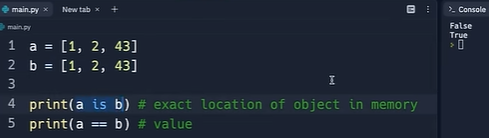
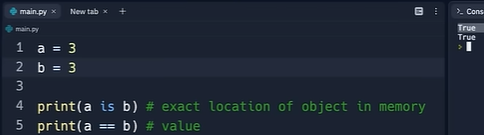

In [ ]:
a=3; b=3; # True
c=5000; d=5000 # False
e="abcd"; f = "abcd" # True
g=(1,2,3,4); h=(1,2,3,4) # False
i=(1,2); j=(1,2) # False
a is b, c is d, e is f, g is h, i is j

(True, False, True, False, False)

# Classes and Objects - Day #57

In [ ]:
class Person():
    def __init__(self, name, occ):
        self.name = name
        self.occ = occ
    # def __init__(self): # Cannot define multiple constructors
    #     self.name = "Shubham"
    #     self.occ = "Python Developer"
    
    def info(self):
        print(f"{self.name}'s occupation is {self.occ}")

In [ ]:
b = Person("Puneet", "Coder")
b.info()

Puneet's occupation is Coder


# Decorators | Day #59

In [ ]:
def greet(fx):
    def fun():
        print("One")
        fx()
        print("Two")
    return fun

# @greet
def hello():
    print("Hello world")

greet(hello)()
# x()

One
One
Hello world
Two
Two


In [17]:
hello

In [14]:
def greet(fx):
    def fun():
        print("One")
        fx()
        print("Two")
    return fun

@greet
def hello():
    print("Hello world")

hello()

One
Hello world
Two


# Getters and Setters

When you're working with **classes** in Python, you often want to control how the data inside a class is accessed or changed.

- A **getter** is a method that lets you **read** the value of a variable.
- A **setter** is a method that lets you **set/change** the value of a variable, often with **some checks or logic**.

In [ ]:
# Imagine you have a class for a person with an age.

# Without any protection:
class Person:
    def __init__(self, age):
        self.age = age  # anyone can change this freely

p = Person(25)
p.age = -5  # that's not a valid age
print(p.age)

-5


In [ ]:
# That's where getters and setters come in — to safely control how that data is used.
# Example Using Getters and Setters

class Person:
    def __init__(self):
        self._age = 0  # the underscore means "private" by convention

    def get_age(self):
        return self._age  # Getter

    def set_age(self, age):
        if age >= 0:
            self._age = age  # Setter with validation
        else:
            print("Age can't be negative!")

# Using the class
p = Person()

p.set_age(25)         # Sets age to 25
print(p.get_age())    # Prints: 25

p.set_age(-5)         # Prints: Age can't be negative!

# What’s going on here?

# - `self._age` is like a hidden/private variable.
# - `get_age()` gives you a safe way to read the age.
# - `set_age(age)` lets you set the age, **but only if it's valid**.

25
Age can't be negative!


In [32]:
# BONUS: Using Python's Built-In `@property` (More Pythonic)
# Python has a cleaner way to do this using special decorators:

class Person:
    def __init__(self):
        self._age = 0

    @property
    def age(self):
        return self._age  # This is the getter

    @age.setter
    def age(self, value):
        if value >= 0:
            self._age = value  # This is the setter
        else:
            print("Age can't be negative!")

p = Person()
p.age = 30          # uses the setter
print(p.age)        # uses the getter
p.age = -10         # prints error message

# Now you can **use it like a normal variable**, but it's still safe.

30
Age can't be negative!


# INHERITANCE

In [1]:
class Employee:
    def __init__(self, name, id):
        self.name, self.id = name, id
    def showDetails(self):
        print(f"NAME: {self.name}; ID = {self.id}")

e1 = Employee("Rohan Das", 400)
e1.showDetails()

NAME: Rohan Das; ID = 400


In [5]:
class Programmer(Employee):
    def showLanguage(self, language = "python"):
        print(f"He knows {language}")
e2 = Programmer("Rohan Das", 400)
e2.showLanguage()

He knows python


# Access modifiers

In [ ]:
class Employee:
    def __init__(self, name, id):
        self.__name = name
        self.id = id
e = Employee("rohan", 1)
e.id # NO ERROR
# e.name # AttributeError: 'Employee' object has no attribute 'name'
# e.__name # AttributeError: 'Employee' object has no attribute '__name' !!!
e._Employee__name # GREAT! This is called NAME MANGLING

'rohan'

In [ ]:
e.__dir__() # Lists all the variables and functions associated with the object's respective CLASS

['_Employee__name',
 'id',
 '__module__',
 '__init__',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
e._Employee__name = "sohan" # Meaning we can easily change the private variables!
e._Employee__name

'sohan'

In [ ]:
class Employee:
    def __init__(self, name, id, age):
        self.__name = name # Private, mangled attribute
        self.id = id # Public: Can be accessed freely from outside the class.
        self._age = age # Protected: By convention, meant to be accessed only within the class and its subclasses, but technically still accessible outside the class.

e = Employee("rohan", 1, 25)
e._age

25

In [ ]:
class Student:
    def __init__(self, age, name):
        self.__age = age
    
    def __funname(self):
        self.y = 34
        print(self.y)
    
class Subject(Student):
    pass

obj = Student("Harry", 21)
obj1 = Subject

# obj.__age # AttributeError
# obj.__funname() # AttributeError
# obj1.__funname() # AttributeError
# obj1._Subject__funname() # AttributeError, meaning child cannot access private vars of parent class
# obj._Student__funname() # Perfect

# Static Methods

In [26]:
class Math:
    def __init__(self, num: int):
        self.num = num
    
    def add_to_num(self, n):
        self.num += n
        print(self.num)

    @staticmethod
    def add(a: int, b: int): # Does not require self as arg
        # print(a+b+self.num) # ERROR: static methods do not have access to the instance (self) or class (cls)
        print(a+b)

m = Math(8)
m.add_to_num(8)
m.add(2,3), Math.add(5,5) # can be called using the class name or an instance of the class.
# add(3,3) # ERROR: name 'add' is not defined

16
5
10


(None, None)

Static methods are independent of the class or instance state. They are ideal for tasks that:

- Do not require access to instance or class data.
- Perform operations that are logically related to the class but do not depend on its state.
- Provide utility or helper functionality without side effects.

# Instance variables vs Class variables

In [ ]:
class Employee:
    company_name = "MNC" # Class variable
    def __init__(self, name):
        self.name = name
        self.raise_pct = 2
    
    def show(self):
        print(f"NAME = {self.name} and raise = {self.raise_pct}% and company = {self.company_name}")

e1 = Employee("e1")
e2 = Employee("e2")
e1.show()
e2.show() # company_name is same for both...we don't have to explicitly specify the company_name every time.
e1.raise_pct = 20 # We can change the instance variable seperately for each instance
e1.show()
e2.show()  # raise_pct remains same for e2, it only changed for e1
e1.company_name = "Big MNC" # When you modify a class variable using an instance (e.g., e1.company_name), Python creates a new instance variable for that specific instance (e1) and assigns the new value to it, which overrides the class variable for that instance.
e1.show()
e2.show() # e2 still uses the class variable company_name, which remains "MNC".
Employee.company_name = "Big MNC"
e1.show()
e2.show() # Now the variable is changed for ALL instances. We can say that all employees now have a new company_name

NAME = e1 and raise = 2% and company = MNC
NAME = e2 and raise = 2% and company = MNC
NAME = e1 and raise = 20% and company = MNC
NAME = e2 and raise = 2% and company = MNC
NAME = e1 and raise = 20% and company = Big MNC
NAME = e2 and raise = 2% and company = MNC
NAME = e1 and raise = 20% and company = Big MNC
NAME = e2 and raise = 2% and company = Big MNC


# Class Methods

In [ ]:
class Employee:
    comp_name = "Tesla"
    def __init__(self):
        self.age=20
    
    def show(xyz): # FYI: first arg in class's function's definition is ALWAYS considered as the object
        print(f"Employee's age is {xyz.age} and company name is {xyz.comp_name}")

    @classmethod
    def change_comp_name(wxyz, new_comp_name): # FYI: for classmethods, the first arg is ALWAYS taken as the class itself
        wxyz.comp_name = new_comp_name

e1 = Employee()
e2 = Employee()
e3 = Employee()
e1.show()
e2.show()
e1.comp_name = "MNC" # now comp_name has become the instance var for e1!
e1.show()
e2.show() # The comp_name of e2 will remain unchanged
e1.change_comp_name("new MNC")
e1.show() # comp_name is still "MNC" because now comp_name has become the instance var for e1!
e2.show()
e3.show() # Now we can see that for all the class instances (except e1 ofcourse), the comp_name is permanently changed to "new MNC"

Employee's age is 20 and company name is Tesla
Employee's age is 20 and company name is Tesla
Employee's age is 20 and company name is MNC
Employee's age is 20 and company name is Tesla
Employee's age is 20 and company name is MNC
Employee's age is 20 and company name is new MNC
Employee's age is 20 and company name is new MNC


# Class Methods as Alternative Constructors

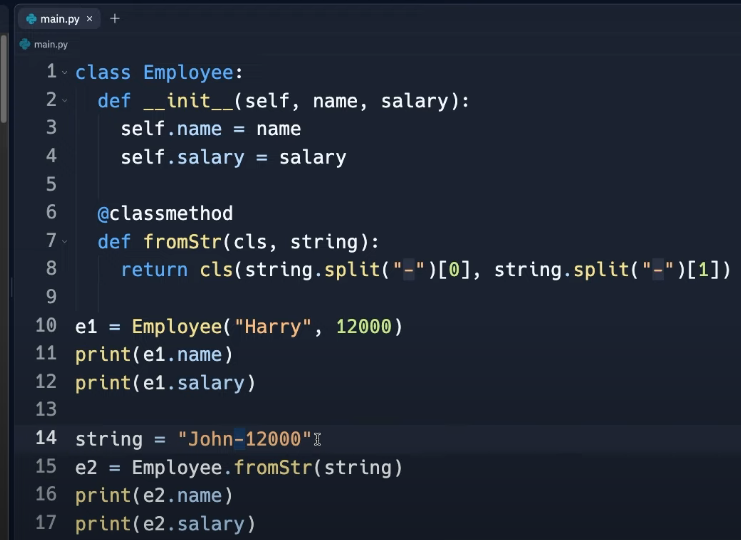

# dir, \_\_dict__ and help method

In [ ]:
x = [1,2,3]
dir(x) # Use dir() to list attributes and methods of the object or a module

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

- Attributes: These are variables that belong to an object.
- Methods: These are functions that belong to an object.

In [5]:
x.__add__

<method-wrapper '__add__' of list object at 0x000001A305284180>

In [14]:
from pprint import pprint
class Example:
    class_var = 42
    def __init__(self, a,b):
        self.a=a
        self.b=b

# Access the __dict__ attribute of the class itself
pprint(Example.__dict__)

mappingproxy({'__dict__': <attribute '__dict__' of 'Example' objects>,
              '__doc__': None,
              '__init__': <function Example.__init__ at 0x000001A305CCD1C0>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Example' objects>,
              'class_var': 42})


In [ ]:
x = Example(2,5)
x.__dict__ # The __dict__ attribute is particularly useful for introspection, debugging, and dynamically modifying an object's attributes.

{'a': 2, 'b': 5}

In [ ]:
x.__dict__["a"]=22
x.a # We were able to modify x's attributes using __dict__

22

In [ ]:
help(str) # Using the help() function is a great way to explore and understand the vast array of functionalities available in Python.

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [18]:
help(x)

Help on Example in module __main__ object:

class Example(builtins.object)
 |  Example(a, b)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, a, b)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  class_var = 42



# super keyword

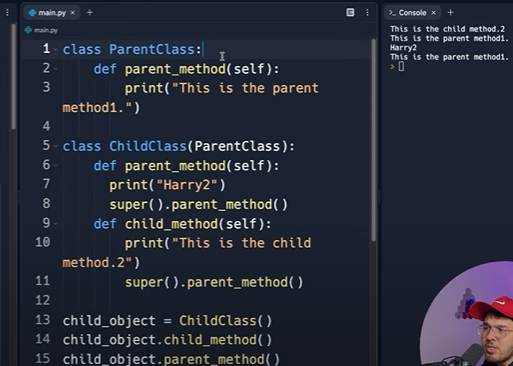 ||| 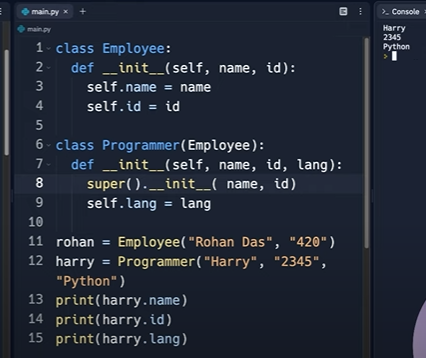

# Magic/Dunder Methods

In [ ]:
class Employee:
    name="abcd"
    def __len__(self):
        i=0
        for k in self.name:
            i += 1
        return i

e = Employee()
print(e.name)
print(len(e)) # dunder method is automatically called..no need to call it explicitly using e.__len__
print(e.__len__()) # same result

abcd
4
4


In [30]:
class Employee:
    def __init__(self, name):
        self.name = name

    def __str__(self): # Special method which can be used to print the object details in a user friendly format.
        return f"Name is {self.name}"
    
e = Employee("Baaz")
print(e)
e # Why is print(e) and the current statement is giving different outputs? Because print calls str methd, and if it is not present, it calls the repr method. But by simply writing "e" calls repr method only. The ideal use of "repr" is to show how an object should actually be shown to the user. Whenever we type print(object), the str method is called first, and if it is not explicitly defined, the repr method is searched, and if that is also not explicitly defined, the default repr is executed which likely shows the object location in memory.

Name is Baaz


In [ ]:
class Employee:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"Name is {self.name}"

e = Employee("Baaz")
print(e)
e # Both output same because of reason mentioned above.

Name is Baaz


Name is Baaz

In [35]:
class Employee:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"Name is {self.name} repr"
    
    def __str__(self):
        return f"Name is {self.name} str"

e = Employee("abcd")

str(e), repr(e) # called both methods explicitly

('Name is abcd str', 'Name is abcd repr')

In [ ]:
class Employee:
    def __init__(self, name):
        self.name = name

    def __call__(self):
        return "Hey I am good"

e = Employee("abcd")
e() # Explicitly calls the "__call__" method. Call method can be used to use a class instance like a function. We can give arguments and executes it however we want

'Hey I am good'

# Method Overriding

In [41]:
class Shape:
    def __init__(self, h, w):
        self.h = h
        self.w = w
    
    def area(self):
        return self.h*self.w
    
rec = Shape(2,3)
rec.area()

6

In [43]:
class Square(Shape):
    def __init__(self, h):
        super().__init__(h,h)

    def area(self):
        return super().area()
    
sq = Square(5)
sq.area()

25

# Operator Overloading

In [ ]:
class Vector:
    def __init__(self, i, j, k):
        self.i=i
        self.j=j
        self.k=k
    
    def __str__(self):
        return f"{self.i}i+{self.j}j+{self.k}k"
    
    def __add__(self,x): # Overloading the addition operator for Vector class
        a = self.i+x.i
        b = self.j+x.j
        c = self.j+x.j
        return Vector(a,b,c)
    
v1 = Vector(1,2,3)
print(v1)
v2 = Vector(4,5,6)
v3 = v1+v2
print(v3, type(v2))

1i+2j+3k
5i+7j+7k <class '__main__.Vector'>


# Multiple Inheritance

In [48]:
class Employee:
    def __init__(self, name):
        self.name = name

    def show(self):
        print("Name is ",self.name)

class Dancer:
    def __init__(self, dance):
        self.dance = dance
    def show(self):
        print("Dance is ",self.dance)

class Person(Employee, Dancer):
    def __init__(self, name, dance):
        self.name = name
        self.dance = dance
    
p1 = Person("abc", "dunce")
p1.show() # Because we have written Employee before Dance class while inheriting
Person.mro()

Name is  abc


[__main__.Person, __main__.Employee, __main__.Dancer, object]

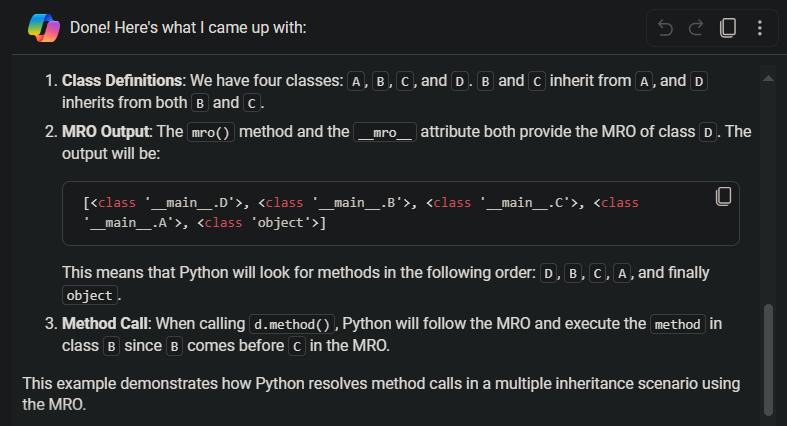

# Multilevel Inheritance

In [ ]:
# Base class (Level 1)
class Animal:
    def __init__(self):
        print("Animal is created")

    def speak(self):
        print("Animal speaks")

# Derived class from Animal (Level 2)
class Dog(Animal):
    def __init__(self):
        # Call constructor of Animal (superclass)
        super().__init__()
        print("Dog is created")

    def speak(self):
        super().speak()
        print("Dog barks")

# Derived class from Dog (Level 3)
class Puppy(Dog):
    def __init__(self):
        # Call constructor of Dog (which in turn calls Animal's constructor)
        super().__init__()
        print("Puppy is created")

    def speak(self):
        super().speak()
        print("But Puppy says paw-paw")

# Create an object of the most derived class
p = Puppy()

# Calling methods from all levels of the hierarchy
p.speak()   # From Puppy

Animal is created
Dog is created
Puppy is created
Animal speaks
Dog barks
But Puppy says paw-paw


# Hybrid and Hierarchical Inheritance

## 🔷 1. **Hierarchical Inheritance**

### ✅ **Definition**:

In **Hierarchical Inheritance**, **multiple derived classes** inherit from **a single base class**. The derived classes share the behavior of the base class but can also have their own specific features.

### 📘 Example:

```python
class Parent:
    def display(self):
        print("Parent class method")

class Child1(Parent):
    def child1_method(self):
        print("Child1 class method")

class Child2(Parent):
    def child2_method(self):
        print("Child2 class method")
```

### 🧩 Diagram:
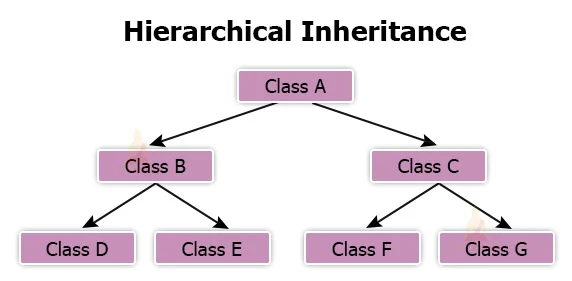

### 💡 Use case:

* Useful when multiple modules (children) need common functionality (from parent).

---

## 2. **Hybrid Inheritance**

### **Definition**:

**Hybrid Inheritance** is a combination of **two or more types** of inheritance (like multiple, single, and hierarchical). It typically leads to more complex class structures.

### 📘 Example:

```python
class A:
    def method_a(self):
        print("Class A")

class B(A):
    def method_b(self):
        print("Class B")

class C(A):
    def method_c(self):
        print("Class C")

class D(B, C):  # Hybrid: Multiple + Hierarchical
    def method_d(self):
        print("Class D")
```

### Diagram:

```
       A
     /   \
    B     C
     \   /
       D
```

* Here:

  * `B` and `C` both inherit from `A` → Hierarchical
  * `D` inherits from both `B` and `C` → Multiple
  * Combination = **Hybrid**

### Use case:

* Used when you want to build a class that combines features from multiple class hierarchies.

---

### Notes on Method Resolution Order (MRO):

Python uses **C3 linearization** (MRO) to resolve ambiguity in hybrid inheritance (especially the "Diamond Problem").

To inspect MRO:

```python
print(D.mro())
```


# Creating command line utility

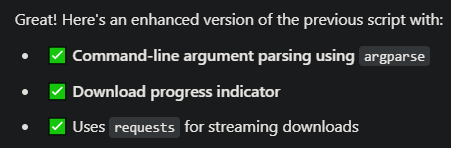

In [ ]:
# https://youtu.be/3IAu6-pgw7I?si=CBR35yTTkF8FETQd
import argparse
import requests
import os
from tqdm import tqdm  # Install with: pip install tqdm

def download_file(url, path):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        # Get total file size in bytes
        total_size = int(response.headers.get('content-length', 0))

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(path), exist_ok=True)

        # Download with progress bar
        with open(path, 'wb') as file, tqdm(
            desc=f"Downloading",
            total=total_size,
            unit='B',
            unit_scale=True,
            unit_divisor=1024,
        ) as progress_bar:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
                    progress_bar.update(len(chunk))

        print(f"\n✅ File downloaded successfully and saved to: {path}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Failed to download file: {e}")
    except Exception as e:
        print(f"❌ An error occurred: {e}")

def main():
    parser = argparse.ArgumentParser(description="Download a file from a URL and save it to a specified path.")
    parser.add_argument("url", help="The URL of the file to download.")
    parser.add_argument("path", help="The full destination path to save the file.")

    args = parser.parse_args()
    download_file(args.url, args.path)

if __name__ == "__main__":
    main()

# Walrus Operator in Python

In [ ]:
# print(a=False) # ERROR
print(a:=False) # Same as ```a=False; print(a)``` in one line

False


In [3]:
# Trivial code without walrus
foods = []
food = input("Which food do u like?")
while food != "quit":
    foods.append(food)
    food = input("Which food do u like?")

print(foods)

['Sambar', 'chocolate']


In [4]:
foods = []
while((food:=input("Which food do u like?"))!="quit"):
    foods.append(food)
print(foods)

['a', 'b', 'c']


# Requests module

In [8]:
import requests
api_key = "b12e10b23e9448238236920caaca3718"
url = f"https://newsapi.org/v2/top-headlines?sources=techcrunch&apiKey={api_key}"
response = requests.get(url)
news = response.json()

In [9]:
news["articles"]

[{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
  'author': 'Lauren Forristal',
  'title': "Bye-bye bots: Altera's game-playing AI agents get backing from Eric Schmidt | TechCrunch",
  'description': 'Autonomous, AI-based players are coming to a gaming experience near you, and a new startup, Altera, is joining the fray to build this new guard of AI Research company Altera raised $9 million to build AI agents that can play video games alongside other player…',
  'url': 'https://techcrunch.com/2024/05/08/bye-bye-bots-alteras-game-playing-ai-agents-get-backing-from-eric-schmidt/',
  'urlToImage': 'https://techcrunch.com/wp-content/uploads/2024/05/Minecraft-keyart.jpg?resize=1200,720',
  'publishedAt': '2024-05-08T15:14:57Z',
  'content': 'Autonomous, AI-based players are coming to a gaming experience near you, and a new startup, Altera, is joining the fray to build this new guard of AI agents.\r\nThe company announced Wednesday that it … [+6416 chars]'},
 {'source': {'id': 'techcr